# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

# Module import

In [34]:
# EDA
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings(action='ignore')

import statsmodels.api as sm
import statsmodels.formula.api as smf

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import r2_score, mean_squared_error

# model
from sklearn.linear_model import LinearRegression

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [35]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [37]:
data.Price

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

# 데이터 전처리

## 결측치 제거

In [38]:
print(f"데이터 개수 : {len(data)}")
print(len(data) - data.count())

데이터 개수 : 6019
Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


- Engine, Power, Seats 행 제거
- New_Price 컬럼은 제거

In [39]:
# Engine, Power, Seats 행 제거
for col in ['Engine', 'Power', 'Seats', 'Mileage']:
    data = data.drop(index = data[data[col].isnull()].index, axis = 0)
    
# New_Price 컬럼 제거
data = data.drop('New_Price', axis=1)

# 결측치 확인
print(f"데이터 개수 : {len(data)}")
print(len(data) - data.count())

데이터 개수 : 5975
Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


## Unnamed: 0, Name 컬럼 제거

In [40]:
data = data.drop(['Unnamed: 0', 'Name'], axis=1)
data

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


## 정규식으로 숫자 추출

**km/kg 혹은 CC 와 같은 단위를 제거하여 object -> int 로 변환해주자**
- Mileage, Engine, Power 컬럼

In [41]:
for col in ['Mileage', 'Engine', 'Power']:    
    data[col] = data[col].str.extract(r'(\d+.\d+|\d+)') # 숫자만 추출

data

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


**Power 컬럼에 결측치 발견 ==> 제거**

In [42]:
data = data.drop(index = data[data['Power'].isnull()].index, axis = 0)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Mileage            5872 non-null   object 
 7   Engine             5872 non-null   object 
 8   Power              5872 non-null   object 
 9   Seats              5872 non-null   float64
 10  Price              5872 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 550.5+ KB


In [44]:
data = data.astype({'Mileage':float, 'Engine':float, 'Power':float})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Mileage            5872 non-null   float64
 7   Engine             5872 non-null   float64
 8   Power              5872 non-null   float64
 9   Seats              5872 non-null   float64
 10  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 550.5+ KB


## 카테고리형 컬럼 확인
- Location, Year, Fuel_Type, Transmission, Owner_Type

In [45]:
# categorical column
cate_col = []
for col in data.columns:
    if data[col].dtype == object:
        cate_col.append(col)
        print('==========================================================')
        print(f"{col} : {data[col].unique()}")
        print(f"{data[col].value_counts()}")
        print()

Location : ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

Fuel_Type : ['CNG' 'Diesel' 'Petrol' 'LPG']
Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

Transmission : ['Manual' 'Automatic']
Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

Owner_Type : ['First' 'Second' 'Fourth & Above' 'Third']
First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64



## Label Encoder, Scaler 적용

In [46]:
numeric_features = [column for column in data.columns if data[column].dtype != object]
categorical_features = [column for column in data.columns if data[column].dtype == object]

data[categorical_features] = data[categorical_features].apply(LabelEncoder().fit_transform)
data[numeric_features] = RobustScaler().fit_transform(data[numeric_features])

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   int32  
 1   Year               5872 non-null   float64
 2   Kilometers_Driven  5872 non-null   float64
 3   Fuel_Type          5872 non-null   int32  
 4   Transmission       5872 non-null   int32  
 5   Owner_Type         5872 non-null   int32  
 6   Mileage            5872 non-null   float64
 7   Engine             5872 non-null   float64
 8   Power              5872 non-null   float64
 9   Seats              5872 non-null   float64
 10  Price              5872 non-null   float64
dtypes: float64(7), int32(4)
memory usage: 458.8 KB


# split data

In [49]:
X = data.drop(["Price"], axis=1)
y = data[['Price']]
print(X.shape, y.shape)

(5872, 10) (5872, 1)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, data.iloc[:, 0], test_size = 0.25, random_state = 0)

# 회귀분석

## 선형회귀 모델 구축

In [93]:
X_train = sm.add_constant(X_train)  # 베타0 에 해당하는 1로 이루어진 벡터를 추가
model = sm.OLS(y_train, X_train, axis = 1)
model_trained = model.fit()

In [98]:
min(model_trained.resid)

-3.375077994860476e-14

In [99]:
model_residuals[model_residuals == min(model_residuals)]

5781   -5.329071e-15
dtype: float64

## 확률오차의 정규성 확인

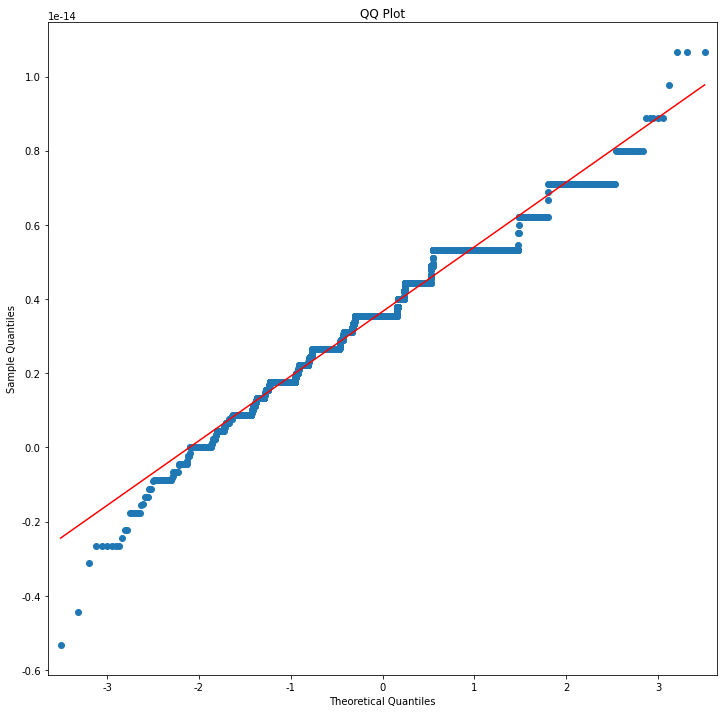

In [84]:
model_residuals = model_trained.resid

# 이상치 제거
model_residuals = model_residuals.drop(index = model_residuals[model_residuals == min(model_residuals)].index, axis = 0)

plt.rcParams['axes.unicode_minus'] = False  # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1,1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

## 확률오차의 등분산성 확인

In [103]:
model_fitted_y[model_fitted_y == min(model_fitted_y)]

438   -4.984545e-15
dtype: float64

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

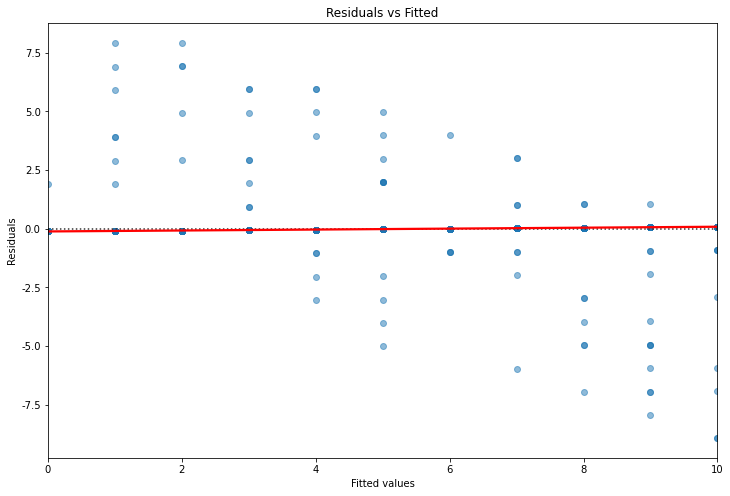

In [104]:
model_fitted_y = model_trained.fittedvalues

# 이상치 제거
model_fitted_y = model_fitted_y.drop(index = model_fitted_y[model_fitted_y == min(model_fitted_y)].index, axis = 0)
y_train = y_train.drop(index = model_fitted_y[model_fitted_y == min(model_fitted_y)].index, axis = 0)

fig, ax = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha':0.5},
             line_kws={'color':'red'}, ax=ax)

ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel = 'Residuals')

위 데이터가 선형회귀모델 가정에 충족함을 볼 수 있다.

## 통계적 해석 

In [105]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:               Location   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.288e+32
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        00:22:03   Log-Likelihood:             1.3966e+05
No. Observations:                4404   AIC:                        -2.793e+05
Df Residuals:                    4393   BIC:                        -2.792e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.276e-15    2.6e-1

- R-squared : 값이 1이 나오는 것으로 보아 성능이 좋음
- Durbin-Watson : 잔차끼리 양의 상관관계를 가짐